<a href="https://colab.research.google.com/github/ua-deti-information-retrieval/Neural-IR-hands-on/blob/main/RI_practical_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RI practical tutorial #1

## Word2Vec and neural IR

TODO explain that we are using torch and why

## Dependencies

In [ ]:
!pip install torch matplotlib

## Quick torch backgroud

### Intro

PyTorch is an open-source deep learning library developed by Facebook's AI Research lab. It's widely recognized for its flexibility and ease-of-use, particularly in research and development settings.

Although it has being popularized as a deep learning library, it main functionality is an efficient mathematical library with optimized auto differentiation capability that can run on acceleartors, namely GPUs.

At its core, like other deep learning libraries, PyTorch manages mathematical computations through a computational graph. This graph is highly optimized and executed using efficient languages like C++. From the user's perspective, interaction with PyTorch is predominantly through a Python interface, ensuring accessibility and ease of use.

Additionaly resources:
- https://pytorch.org/tutorials/beginner/basics/intro.html
- https://www.dataquest.io/blog/pytorch-for-beginners/

### Tensors

As a mathematical library, torch uses "tensors" as the key data structure to represent any numerical value. Tensors can have any arbritary shape allowing us to represent scalars, vectors, matrices and multidimentional matrices.

These tensors are quite akin to NumPy's ndarrays. However, a significant distinction is their ability to operate on GPUs or other hardware accelerators. Interestingly, tensors and NumPy arrays can often share the same memory, which helps in avoiding redundant data copying. Another noteworthy feature of tensors is their optimization for automatic differentiation

In [ ]:
import torch

In [ ]:
# creating several exemples of tensors
scalar_value = torch.tensor(1)
vector = torch.tensor([0,1,2])
matrix = torch.tensor([[0,1,2],[3,4,5]])
nmatrix = torch.tensor([[[0,1,2],[3,4,5]],[[6,7,8],[9,10,11]]])

print(f"{scalar_value=}")
print(f"{vector=}")
print(f"{matrix=}")
print(f"{nmatrix=}")

scalar_value=tensor(1)
vector=tensor([0, 1, 2])
matrix=tensor([[0, 1, 2],
        [3, 4, 5]])
nmatrix=tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])


In [ ]:
#checking some properties of the tensors

print("nmatrix shape:", nmatrix.shape)
print("vector dtypr:", vector.dtype)
print("matrix device:", matrix.device)

nmatrix shape: torch.Size([2, 2, 3])
vector dtypr: torch.int64
matrix device: cpu


### Operations

Torch supports most of the alberic operations, like product, sum, inner product (dot product), transpose etc.


In [ ]:
# sums [0, 1, 2] with [1, 1, 1]
print(vector + torch.ones((3,))) # + is overload as torch.add

# dot of (2,3) with (3,) -> (2,)
print(matrix @ vector) # @ is overload as torch.matmul

# when scalar ops with vector or matrix, torch automaticly broadcasts the scalar to the same shape
print(2 * vector) # * is overload as torch.mul

tensor([1., 2., 3.])
tensor([ 5, 14])
tensor([0, 2, 4])


### Automatic Differentiation (Auto-Diff):

PyTorch provides an automatic differentiation system called Autograd. This feature allows for the automatic computation of gradients, which is essential for training neural networks. By keeping track of operations performed on tensors, Autograd can automatically compute the derivatives (gradients) needed for optimization.

Lets put everything together and write function that minimizes any arbritary polynominal.

As an example consider $f(x) = x^4-3x^2-x+4$

In [ ]:
def polynominal(x):
  return x**4 - 3*x**2 - x + 4

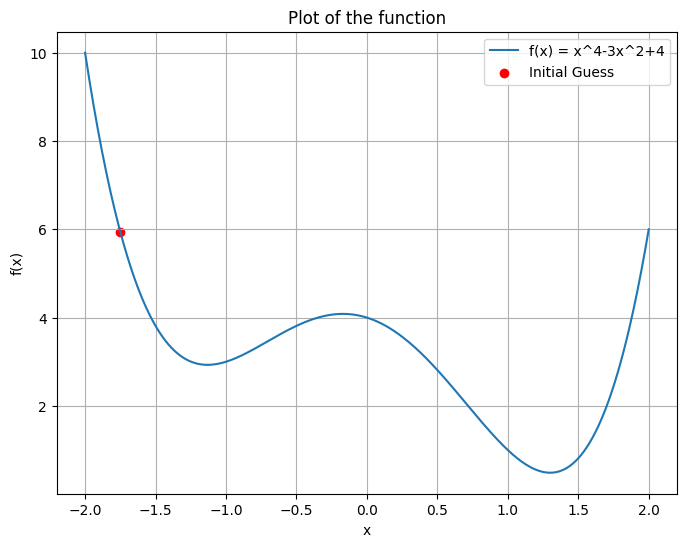

In [ ]:
import matplotlib.pyplot as plt

# plot
x = torch.linspace(-2, 2, 400)
y = polynominal(x)

x_initial_guess = -1.75
y_initial_guess = polynominal(x_initial_guess)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = x^4-3x^2+4')
plt.scatter(x_initial_guess, y_initial_guess, color='red', label='Initial Guess')  # Plot the initial guess as a red dot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def minimize_polynominal(poly_func, initial_point, lr=0.01, iterations=50):

  x = torch.tensor(initial_point, requires_grad=True)
  list_of_x_and_grads = []
  for i in range(iterations):

    y = polynominal(x)
    y.backward() # torch call that triggers the computation of gradients to all of the registed variables, which in this case is only "x"

    # its important to use no_grad context manager to tell pytorch that we do not want to track this operation in the autodiff graph
    with torch.no_grad():
      list_of_x_and_grads.append((x.item(), x.grad.item()))
      x -= x.grad * lr
      x.grad.zero_()
  return x, list_of_x_and_grads


In [ ]:
def make_visualization(poly_func, initial_point, lr=0.01, iterations=50, show_grad_lines=False):
  # plot
  x_f = torch.linspace(-2, 2, 400)
  y_f = poly_func(x_f)

  plt.figure(figsize=(8, 6))
  plt.plot(x_f, y_f, label='f(x) = x^4-3x^2+4')

  final_value, list_of_x_and_grad = minimize_polynominal(poly_func, initial_point, lr, iterations)

  for x, grad in list_of_x_and_grad:

    y = poly_func(x)

    plt.scatter(x, y, color='red')  # Plot the initial guess as a red dot

    if show_grad_lines:
      # add as well the gradient
      tangent_x = torch.linspace(x - 0.1, x + 0.1, 10) # interval of x-values for the tangent line
      tangent_y = grad * (tangent_x - x) + y
      plt.plot(tangent_x, tangent_y, color='green')  # Tangent line


  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Plot of the function')
  plt.legend()
  plt.grid(True)
  plt.show()

  return final_value



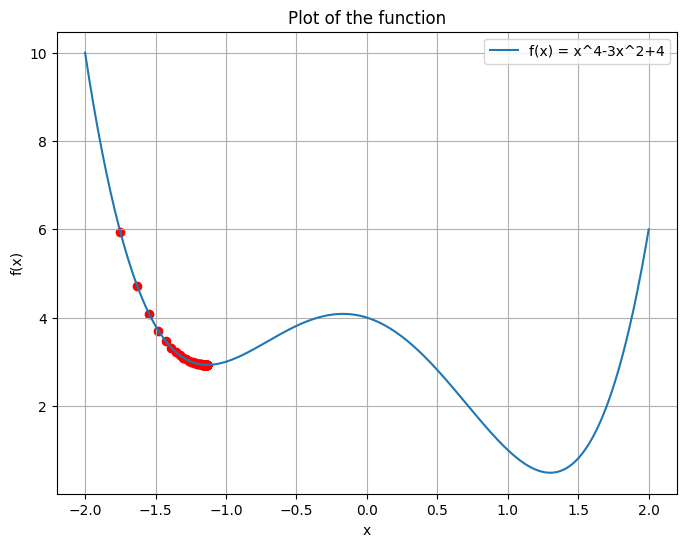

tensor(-1.1331, requires_grad=True)

In [ ]:
make_visualization(polynominal, -1.75)

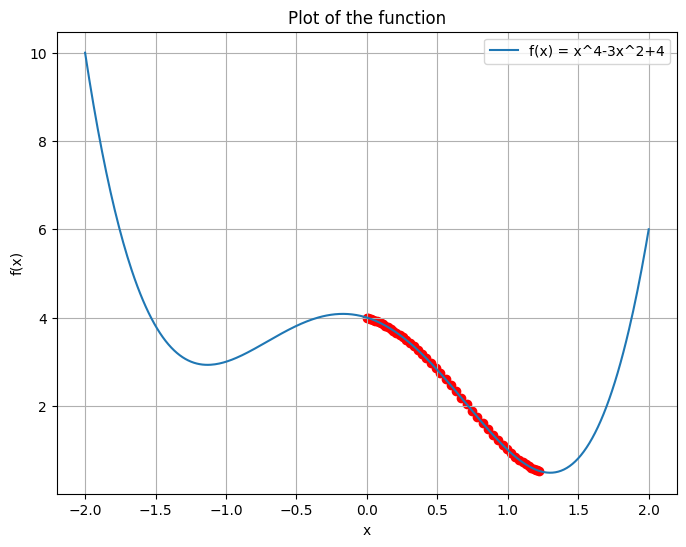

tensor(1.2326, requires_grad=True)

In [ ]:
make_visualization(polynominal, 0.)

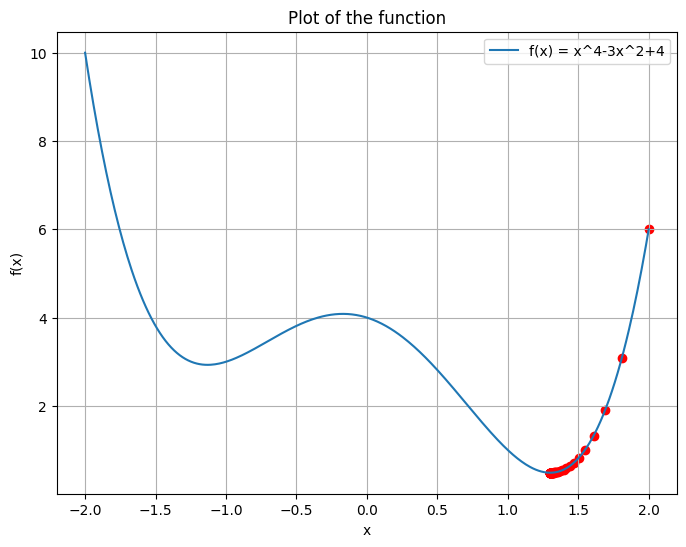

tensor(1.3010, requires_grad=True)

In [ ]:
make_visualization(polynominal, 2.)

In [ ]:
def percetron(x):
  return torch.matmul(x, w)+b
z = percetron(x)

In [ ]:
# ground through
y = torch.tensor([1.,0.,1.])

def compute_loss(z, y):
  # output in probabilities
  prob_z = torch.nn.functional.sigmoid(z)
  print(f"{prob_z=}")
  # bce loss in practice use instead torch.nn.functional.binary_cross_entropy_with_logits for numerical stability
  loss = - (y*torch.log(prob_z) + (1-y) * torch.log(1-prob_z))
  print(f"{loss=}")
  loss = loss.mean()
  print(f"{loss=}")
  return loss

loss = compute_loss(z, y)


#loss.backward()
#print(w.grad)
#print(b.grad)

prob_z=tensor([0.7236, 0.9558, 0.2242], grad_fn=<SigmoidBackward0>)
loss=tensor([0.3235, 3.1196, 1.4951], grad_fn=<NegBackward0>)
loss=tensor(1.6461, grad_fn=<MeanBackward0>)


In [ ]:
torch.nn.functional.binary_cross_entropy_with_logits(z,y)

tensor(1.6461, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

### Computing Gradients

To optimize weights of parameters in the neural network, we need to
compute the derivatives of our loss function with respect to parameters,
namely, we need $\frac{\partial loss}{\partial w}$ and
$\frac{\partial loss}{\partial b}$ under some fixed values of
``x`` and ``y``. To compute those derivatives, we call
``loss.backward()``, and then retrieve the values from ``w.grad`` and
``b.grad``:


In [ ]:

def optimize(w,b,loss):

  loss.backward()

  # its important to tell pytorch that we do not want to track this operation in the autodiff graph
  with torch.no_grad():

    w -= w.grad * 0.1
    b -= b.grad * 0.1

    # After the update, gradients should be zeroed out
    w.grad.zero_()
    b.grad.zero_()

  return w,b

optimize(w,b,loss)

tensor([[-0.0921,  0.3186, -0.2586],
        [-0.0921,  0.3186, -0.2586],
        [-0.0921,  0.3186, -0.2586],
        [-0.0921,  0.3186, -0.2586],
        [-0.0921,  0.3186, -0.2586]])
tensor([-0.0921,  0.3186, -0.2586])


(tensor([[ 0.3843,  1.2350, -0.5784],
         [ 0.8741, -0.0887, -0.6504],
         [-0.0316,  1.1217,  1.6049],
         [-1.2387, -0.9009, -0.0498],
         [ 0.6365,  0.4918, -1.0309]], requires_grad=True),
 tensor([ 0.3933,  1.0244, -0.3815], requires_grad=True))

In [ ]:
for _ in range(5):
  z = percetron(torch.ones(5))
  loss = compute_loss(z, y)
  w,b = optimize(w,b,loss)
  #print(f"{w=}")

prob_z=tensor([0.8849, 0.1007, 0.2524], grad_fn=<SigmoidBackward0>)
loss=tensor([0.1223, 0.1062, 1.3767], grad_fn=<NegBackward0>)
loss=tensor(0.5350, grad_fn=<MeanBackward0>)
tensor([[-0.0384,  0.0336, -0.2492],
        [-0.0384,  0.0336, -0.2492],
        [-0.0384,  0.0336, -0.2492],
        [-0.0384,  0.0336, -0.2492],
        [-0.0384,  0.0336, -0.2492]])
tensor([-0.0384,  0.0336, -0.2492])
prob_z=tensor([0.8872, 0.0989, 0.2817], grad_fn=<SigmoidBackward0>)
loss=tensor([0.1197, 0.1041, 1.2671], grad_fn=<NegBackward0>)
loss=tensor(0.4970, grad_fn=<MeanBackward0>)
tensor([[-0.0376,  0.0330, -0.2394],
        [-0.0376,  0.0330, -0.2394],
        [-0.0376,  0.0330, -0.2394],
        [-0.0376,  0.0330, -0.2394],
        [-0.0376,  0.0330, -0.2394]])
tensor([-0.0376,  0.0330, -0.2394])
prob_z=tensor([0.8895, 0.0972, 0.3116], grad_fn=<SigmoidBackward0>)
loss=tensor([0.1171, 0.1022, 1.1660], grad_fn=<NegBackward0>)
loss=tensor(0.4618, grad_fn=<MeanBackward0>)
tensor([[-0.0368,  0.0324, -0.2

## ASD